In [1]:
!pip install numpy_financial


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt
import yfinance as yf

''
#price for 2009 - now
bitcoin = {
    # '2009': 0.003,
    # '2010': 0.5,
    # '2011': 10,
    # '2012': 10,
    '2013': 600,
    '2014': 310,
    '2015': 360,
    '2016': 1000,
    '2017': 19000,
    '2018': 3552,
    '2019': 13000,
    '2020': 28700,
    '2021': 66103,
    'today': 16555
}

budget = 100_000

In [3]:
print(f'standard deviation = {round(np.std(list(bitcoin.values())), 2)}')

standard deviation = 19457.9


In [4]:
profit_rate = npf.irr([-budget, 3_552 * 10, 13_000 * 10,
    28_700 * 10, 66_103 * 10, 47_271 * 10])
print(f'profit rate = {round(profit_rate, 4)}')

profit rate = 1.2551


[166.67, 322.58, 277.78, 100.0, 5.26, 28.15, 7.69, 3.48, 1.51, 6.04]


Text(0, 0.5, 'quantity of bitcoins we could buy using budget')

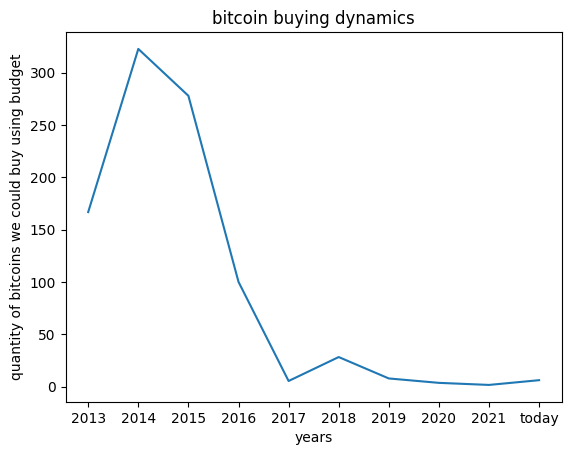

In [5]:
quantity = [round(budget / price, 2) for price in bitcoin.values()]
print(quantity)
plt.plot(tuple(bitcoin.keys()), quantity)
plt.title('bitcoin buying dynamics')
plt.xlabel('years')
plt.ylabel('quantity of bitcoins we could buy using budget')

In [6]:
bitcoin_historical_price = yf.download(tickers='BTC-USD', period='max', interval='3mo')['Close']
bitcoin_historical_price

[*********************100%***********************]  1 of 1 completed


Date
2014-09-01      378.046997
2014-12-01      254.263000
2015-03-01      230.190002
2015-06-01      230.056000
2015-09-01      377.321014
2015-12-01      437.696991
2016-03-01      531.385986
2016-06-01      575.471985
2016-09-01      745.690979
2016-12-01     1179.969971
2017-03-01     2286.409912
2017-06-01     4703.390137
2017-09-01    10233.599609
2017-12-01    10397.900391
2018-03-01     7494.169922
2018-06-01     7037.580078
2018-09-01     4017.268555
2018-12-01     3854.785400
2019-03-01     8574.501953
2019-06-01     9630.664062
2019-09-01     7569.629883
2019-12-01     8599.508789
2020-03-01     9461.058594
2020-06-01    11680.820312
2020-09-01    19625.835938
2020-12-01    45137.769531
2021-03-01    37332.855469
2021-06-01    47166.687500
2021-09-01    57005.425781
2021-12-01    43193.234375
2022-03-01    31792.310547
2022-06-01    20049.763672
2022-09-01    17168.566406
2022-12-01    22636.468750
2023-01-25    22622.650391
Name: Close, dtype: float64

Text(0.5, 1.0, 'bitcoin price dynamics')

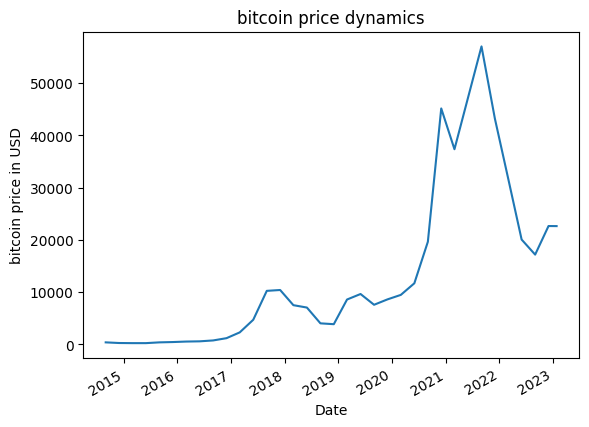

In [7]:
bitcoin_historical_price.plot()
plt.ylabel('bitcoin price in USD')
plt.title('bitcoin price dynamics')

In [8]:
exact_bitcoin_price = yf.download(tickers='BTC-USD', period='1y')
exact_bitcoin_price

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-25,36654.804688,37444.570312,35779.429688,36954.003906,36954.003906,26428189594
2022-01-26,36950.515625,38825.410156,36374.906250,36852.121094,36852.121094,31324598034
2022-01-27,36841.878906,37148.324219,35629.281250,37138.234375,37138.234375,25041426629
2022-01-28,37128.445312,37952.878906,36211.109375,37784.332031,37784.332031,22238830523
2022-01-29,37780.714844,38576.261719,37406.472656,38138.179688,38138.179688,17194183075
...,...,...,...,...,...,...
2023-01-21,22677.427734,23282.347656,22511.833984,22777.625000,22777.625000,32442278429
2023-01-22,22777.986328,23056.730469,22387.900391,22720.416016,22720.416016,24746386230
2023-01-23,22721.087891,23126.486328,22654.304688,22934.431641,22934.431641,26518700512


In [9]:
bitcoins_per_day = 1_000 / exact_bitcoin_price['Close']
print('bitcoins you can buy with 1000 dollar\'s budget')
bitcoins_per_day

bitcoins you can buy with 1000 dollar's budget


Date
2022-01-25    0.027061
2022-01-26    0.027135
2022-01-27    0.026926
2022-01-28    0.026466
2022-01-29    0.026220
                ...   
2023-01-21    0.043903
2023-01-22    0.044013
2023-01-23    0.043603
2023-01-24    0.044177
2023-01-25    0.044203
Name: Close, Length: 366, dtype: float64

Text(0.5, 1.0, "bitcoins you can buy with 1000 dollar's budget")

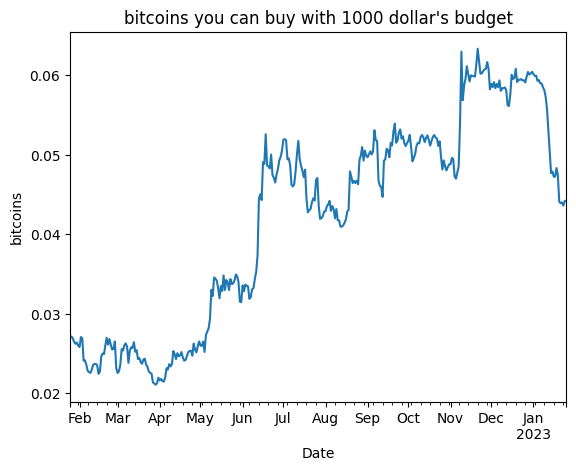

In [10]:
bitcoins_per_day.plot()
plt.ylabel('bitcoins')
plt.title('bitcoins you can buy with 1000 dollar\'s budget')

In [12]:
bitcoin = yf.download('BTC-USD', start='2015-01-01')['Close']
bitcoin

[*********************100%***********************]  1 of 1 completed


Date
2015-01-01      314.248993
2015-01-02      315.032013
2015-01-03      281.082001
2015-01-04      264.195007
2015-01-05      274.473999
                  ...     
2023-01-21    22777.625000
2023-01-22    22720.416016
2023-01-23    22934.431641
2023-01-24    22636.468750
2023-01-25    22595.181641
Name: Close, Length: 2947, dtype: float64

<AxesSubplot: xlabel='Date'>

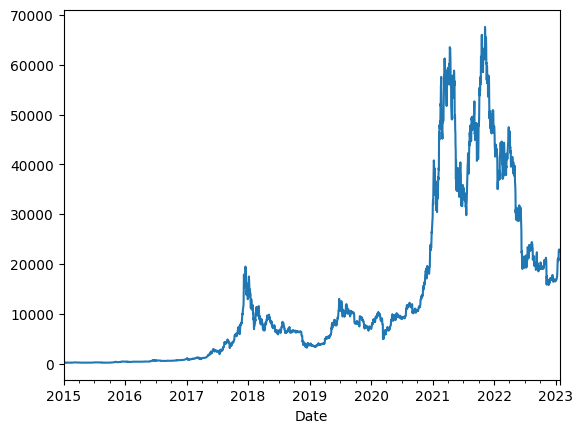

In [17]:
bitcoin.plot()

In [14]:
bitcoin_change = bitcoin.pct_change()
bitcoin_change

Date
2015-01-01         NaN
2015-01-02    0.002492
2015-01-03   -0.107767
2015-01-04   -0.060079
2015-01-05    0.038907
                ...   
2023-01-21    0.004457
2023-01-22   -0.002512
2023-01-23    0.009420
2023-01-24   -0.012992
2023-01-25   -0.001824
Name: Close, Length: 2947, dtype: float64

<AxesSubplot: xlabel='Date'>

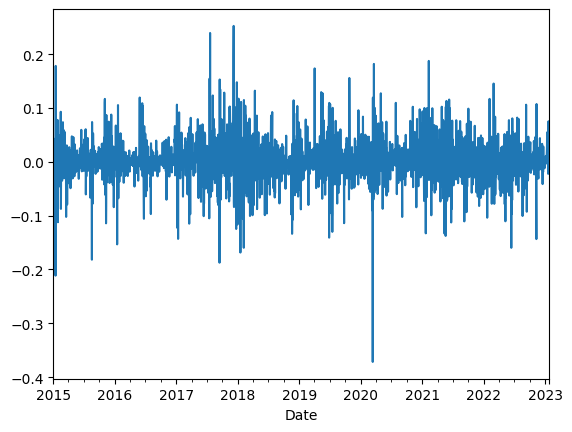

In [24]:
bitcoin_change.plot()

In [23]:
cumulative_return = (bitcoin_change + 1).cumprod()
cumulative_return

Date
2015-01-01          NaN
2015-01-02     1.002492
2015-01-03     0.894456
2015-01-04     0.840719
2015-01-05     0.873428
                ...    
2023-01-21    72.482730
2023-01-22    72.300680
2023-01-23    72.981719
2023-01-24    72.033544
2023-01-25    71.902161
Name: Close, Length: 2947, dtype: float64

<AxesSubplot: xlabel='Date'>

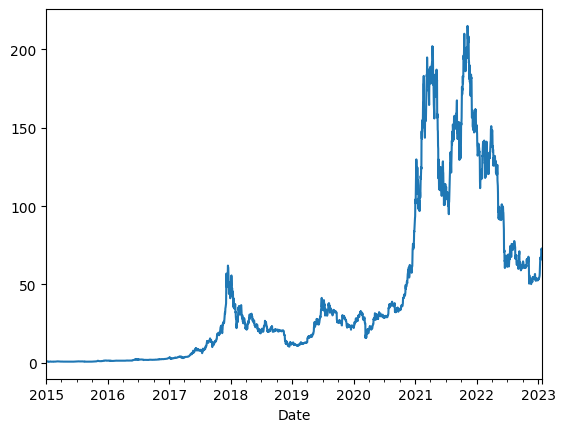

In [18]:
cumulative_return.plot()

1. Calculate the volatility of Bitcoin and output the risk %

In [26]:
import numpy as np

np.std(cumulative_return)

51.67122000315649

In [28]:
risk = np.std(cumulative_return) * np.sqrt(252)
risk

820.2551884059492

2. Calculate and output the Sharpe ratio

In [31]:
sharpe_ratio = (np.mean(cumulative_return) / np.std(cumulative_return)) * np.sqrt(252)
sharpe_ratio

13.0737100563145